# Extreme Value Analysis

Please refer to the following link for the theory on this topic.

https://tudelft-citg.github.io/HOS-prob-design/intro.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import plotly.graph_objects as go
import itertools
from scipy.signal import find_peaks
from matplotlib import pyplot as plt
from matplotlib.legend_handler import HandlerLine2D

%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

- Establish the Peak Over Threshold values.
- Starting point is Hs data in file hsarras=ys POT test.csv with 3 hour Hs data
- Here the Thershold (thresh) is chosen $H_s = 2.5 m$ and the time is 4 (j) * 3 hrs = 12 hrs
- Peaks delivers the POT values over which one should do the Weibull or Gumbel fit

Number of Wind values:  11688



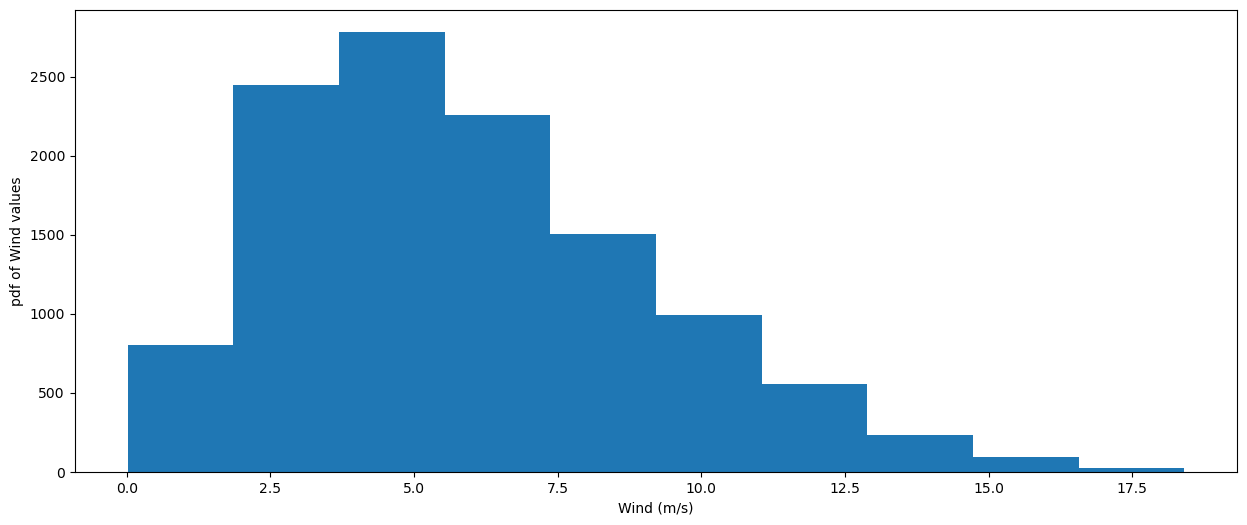

In [2]:
wave_data = pd.read_excel('Wind_array_def.xlsx')
time_series = wave_data['Wind']
# 
#  Extract Wind from database and plot histogram
#

fig, ax = plt.subplots(1, 1)
plt.xlabel('Wind (m/s)')
plt.ylabel('pdf of Wind values')
ax.hist(time_series, histtype='stepfilled')

#
imax = len(time_series)
print('Number of Wind values: ',imax)
print()
dft = wave_data.get("Extracted time")
pass

## Peak over threshold

nan


Text(0.5, 1.0, 'Mean Residual Life Plot')

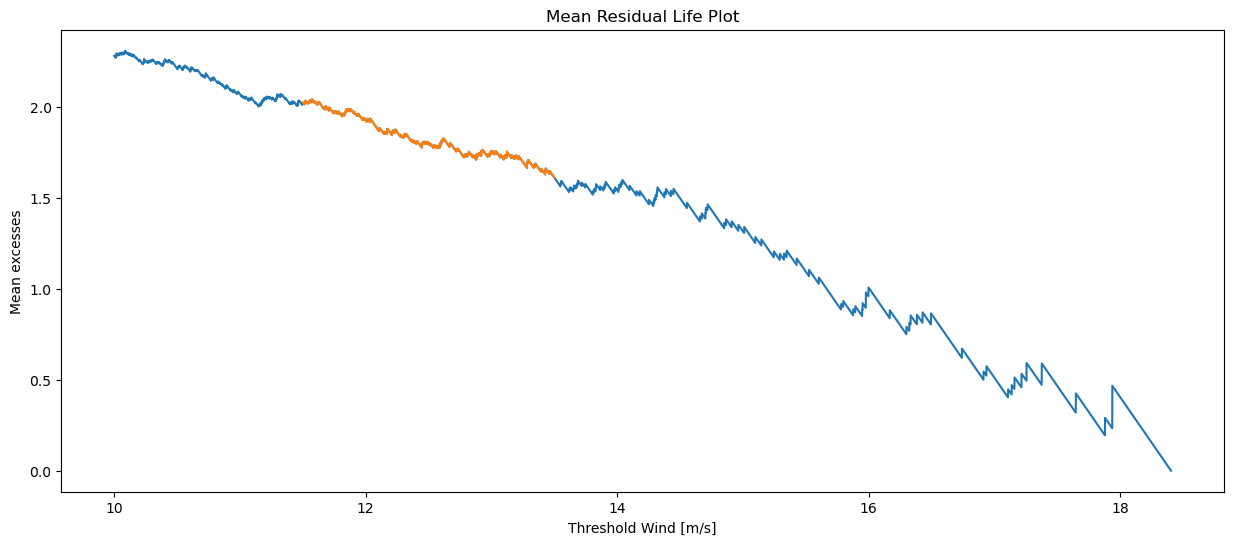

In [11]:
#define parameters
dl = 12 #in hours
threshold = np.arange(10, 20, 0.001)
mean_excesses = np.zeros(len(threshold))

for i in range(len(threshold)):
    idx_pot, pks = find_peaks(time_series, height = threshold[i], distance = 4) 
    pot_list = time_series.loc[idx_pot]
    excesses = pot_list - threshold[i]
    mean_excesses[i] = np.mean(excesses)
    
ci = 1.96 * np.std(mean_excesses)/np.sqrt(len(mean_excesses))
print(ci)

plt.plot(threshold, mean_excesses)
plt.plot(threshold[1500:3500], mean_excesses[1500:3500])
ax.fill_between(threshold, (mean_excesses-ci), (mean_excesses+ci), color='b', alpha=.1)
plt.xlabel('Threshold Wind [m/s]')
plt.ylabel('Mean excesses')
plt.title('Mean Residual Life Plot')

In [3]:
#
# Peak Over Through code
def pot_method(data, threshold, dtime):
    idx_pot, _ = find_peaks(data, height = threshold, distance = dtime)
    pot_list = data.loc[idx_pot]
    return idx_pot, pot_list
#

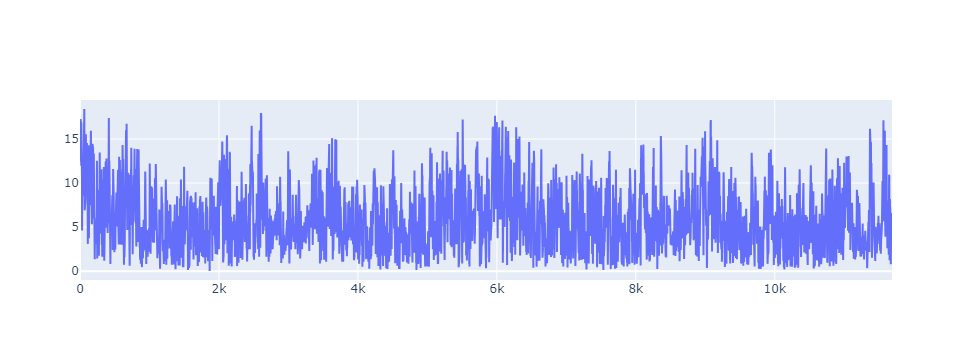

In [4]:
fig = go.Figure(data=go.Scatter(
    y = time_series,
    mode = 'lines'
))

fig.show()

In [5]:
#
# threshold is the Hs threshold value
# dtime is the number of values used in time (here 4 * 3 hour samples = 12 hrs)
#
threshold = 12.5
dtime = 4
tare = threshold #0

indices,pot_maxima = pot_method(time_series, threshold, dtime)

kmax = len(pot_maxima)
print("Number of peaks based on Threshold: ",threshold," and time ",dtime," is ",kmax)
print('Last part of the calculated Peaks over Threshold values: ')
print(pot_maxima.tail())

Number of peaks based on Threshold:  12.5  and time  4  is  139
Last part of the calculated Peaks over Threshold values: 
11376    14.387981
11384    14.672795
11564    17.137351
11584    15.951772
11608    14.305537
Name: Wind, dtype: float64


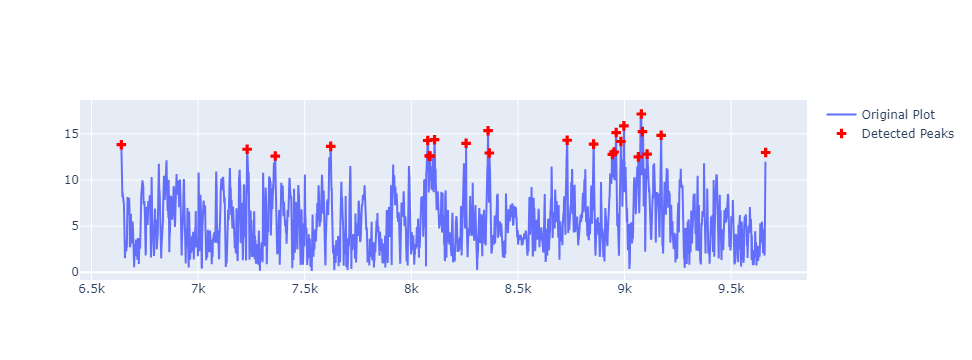

TypeError: 'NoneType' object is not subscriptable

In [6]:
#
#
# following is a subsegment to extract part of the data for visualization
# NB: j is starting value op peaks and range is number of points to be visualized
#
sub_ind = []
j = 100
for i in range(0,24):
    k = j + i
    val = indices[k]
    sub_ind.append(val)
#
sub_pot = pot_maxima.loc[sub_ind]

#
# Update numbers based on range!
#
inst = sub_ind[0]
inen = sub_ind[23]
sub_tim = time_series[inst:inen]
sub_pos = list(itertools.chain(range(inst, inen)))
#
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=sub_pos,y=sub_tim,
    mode='lines',
    name='Original Plot'
))

#
#
fig.add_trace(go.Scatter(
    x=sub_ind,y=sub_pot,
    mode='markers',
    marker=dict(
        size=8,
        color='red',
        symbol='cross'
    ),
    name='Detected Peaks'
))

fig.show()

#
pot_time = []
for i in range(0,kmax):
    val = indices[i]
    pot_time.append(dft[val])
#
fig, ax = plt.subplots(1, 1)
plt.xlabel('Hs (m)')
plt.ylabel('pdf of Hs max values')
ax.hist(pot_maxima, histtype='stepfilled')
#
pass

In [7]:
import xlsxwriter

workbook = xlsxwriter.Workbook('EVA result POT extremes.xlsx')
worksheet = workbook.add_worksheet()

array = [indices, 
         pot_time,
         pot_maxima]

row = 0

for col, data in enumerate(array):
    worksheet.write_column(row, col, data)

workbook.close()

## Extreme value distributions

In [8]:
import reliability.Fitters as rf

In [9]:
dfmax = []
for it in pot_maxima.items():
    val = it[1] - tare # pot_maxima[i]
    dfmax.append(val)    
dfmax.sort()

### Fit Weibull 2P

Results from Fit_Weibull_2P (95% CI):
Analysis method: Maximum Likelihood Estimation (MLE)
Optimizer: TNC
Failures / Right censored: 139/0 (0% right censored) 

Parameter  Point Estimate  Standard Error  Lower CI  Upper CI
    Alpha         1.88105        0.147257   1.61348   2.19299
     Beta         1.13784       0.0782883  0.994298   1.30211 

Goodness of fit    Value
 Log-likelihood -219.055
           AICc  442.199
            BIC  447.979
             AD 0.623733 



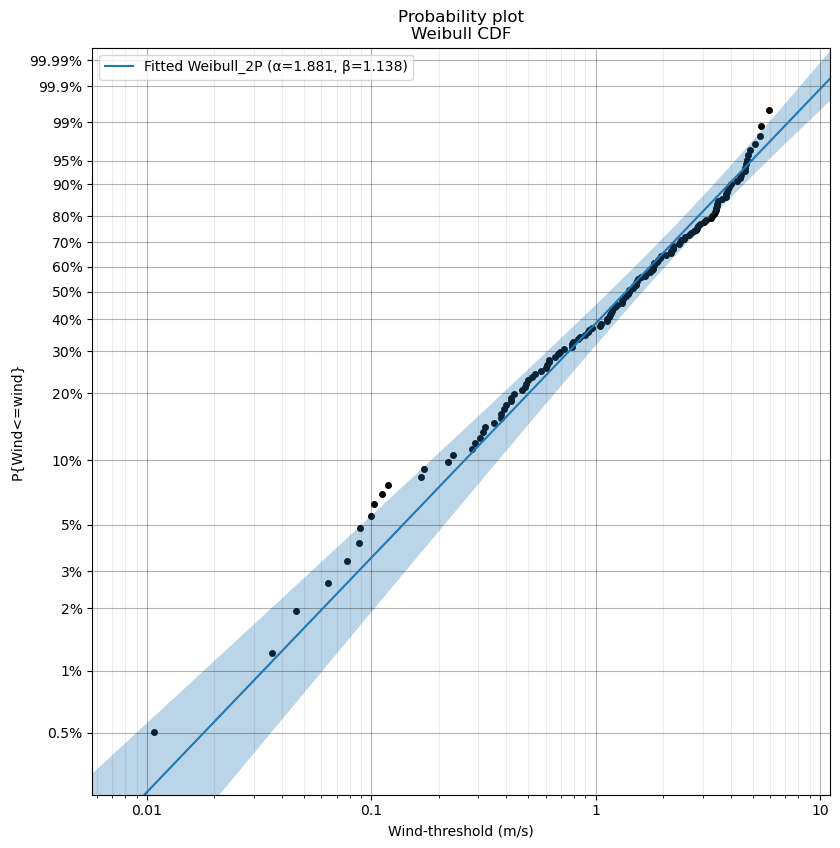

In [10]:
waw2 = rf.Fit_Weibull_2P(failures=dfmax)
plt.ylabel('P{Wind<=wind}')
plt.xlabel('Wind-threshold (m/s)')
plt.show()

### Fit Weibull 3P

Results from Fit_Weibull_3P (95% CI):
Analysis method: Maximum Likelihood Estimation (MLE)
Optimizer: TNC
Failures / Right censored: 139/0 (0% right censored) 

Parameter  Point Estimate  Standard Error  Lower CI  Upper CI
    Alpha         1.88105        0.147257   1.61348   2.19299
     Beta         1.13784       0.0782883  0.994298   1.30211
    Gamma               0               0         0         0 

Goodness of fit    Value
 Log-likelihood -219.055
           AICc  444.288
            BIC  452.914
             AD 0.623733 



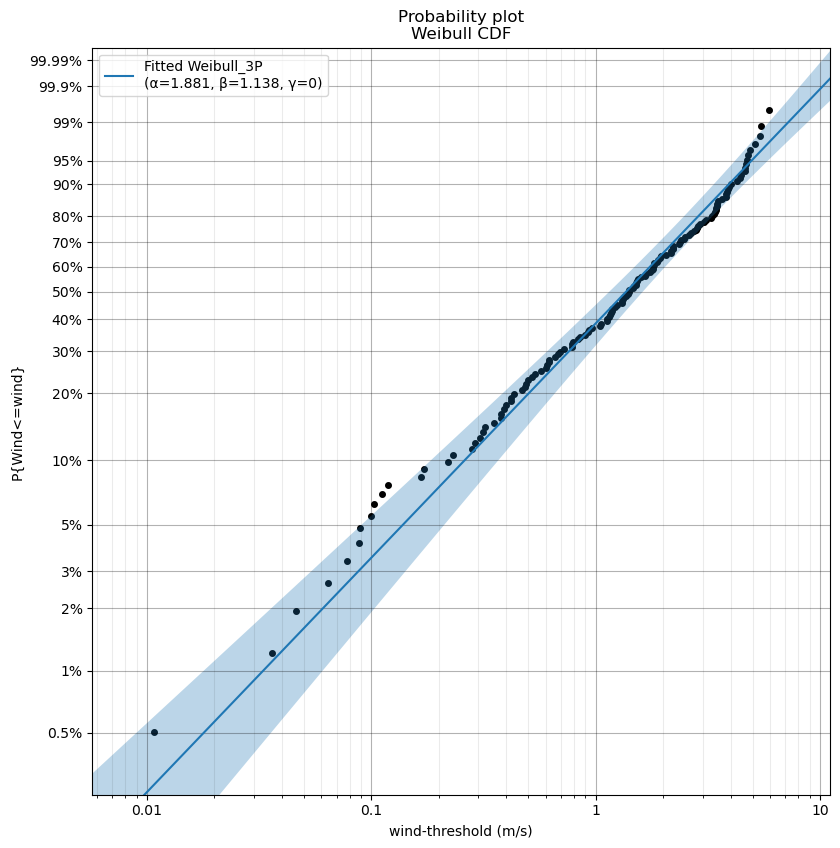

In [17]:
#
#  Weibull 3P fit delivers alpha = scale factor, beta = shape factor & gamma = location factor

waw3 = rf.Fit_Weibull_3P(failures=dfmax)
#waw3 = rf.Fit_Weibull_CR(failures=dfmax)

plt.ylabel('P{Wind<=wind}')
plt.xlabel('wind-threshold (m/s)')
plt.show()


### Fit Gumbel 2P

Results from Fit_Gumbel_2P (95% CI):
Analysis method: Maximum Likelihood Estimation (MLE)
Optimizer: TNC
Failures / Right censored: 139/0 (0% right censored) 

Parameter  Point Estimate  Standard Error  Lower CI  Upper CI
       Mu         2.58236        0.146284   2.29565   2.86907
    Sigma         1.61992       0.0970731   1.44041    1.8218 

Goodness of fit    Value
 Log-likelihood -273.165
           AICc  550.417
            BIC  556.198
             AD  6.71084 



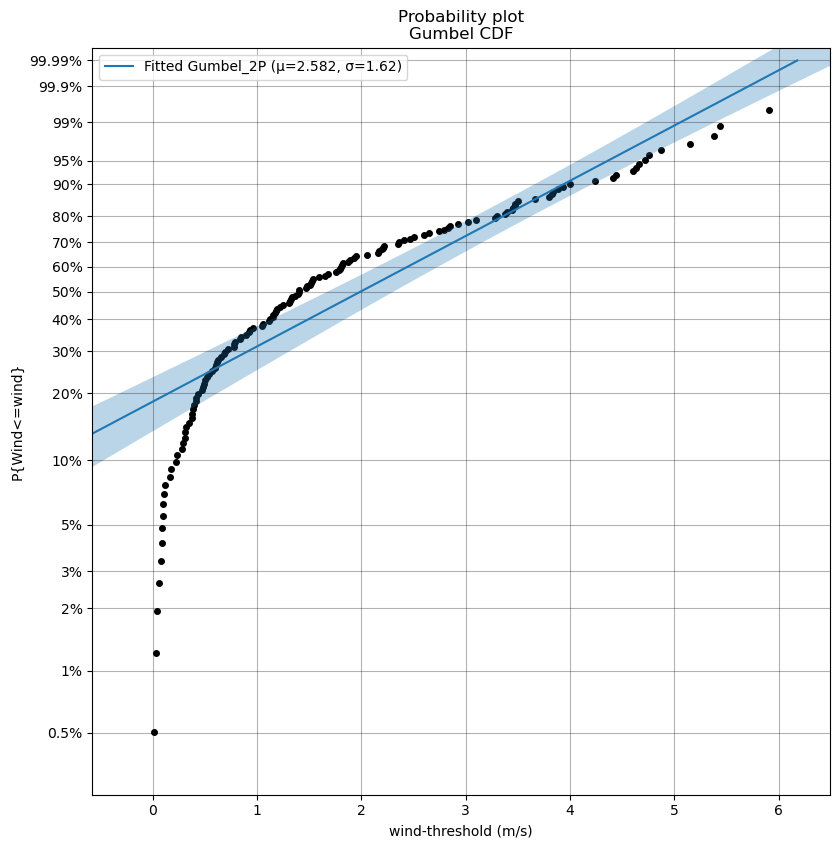

In [12]:
wag = rf.Fit_Gumbel_2P(failures=dfmax)
plt.ylabel('P{Wind<=wind}')
plt.xlabel('wind-threshold (m/s)')
plt.show()

### Fit Exponential 2P

Results from Fit_Exponential_2P (95% CI):
Analysis method: Maximum Likelihood Estimation (MLE)
Optimizer: TNC
Failures / Right censored: 139/0 (0% right censored) 

Parameter  Point Estimate  Standard Error  Lower CI  Upper CI
   Lambda        0.558792       0.0473961  0.473208  0.659855
 1/Lambda         1.78957         0.15179   1.51548   2.11323
    Gamma       0.0106348               0 0.0106348 0.0106348 

Goodness of fit    Value
 Log-likelihood -219.895
           AICc  443.878
            BIC  449.659
             AD 0.982053 



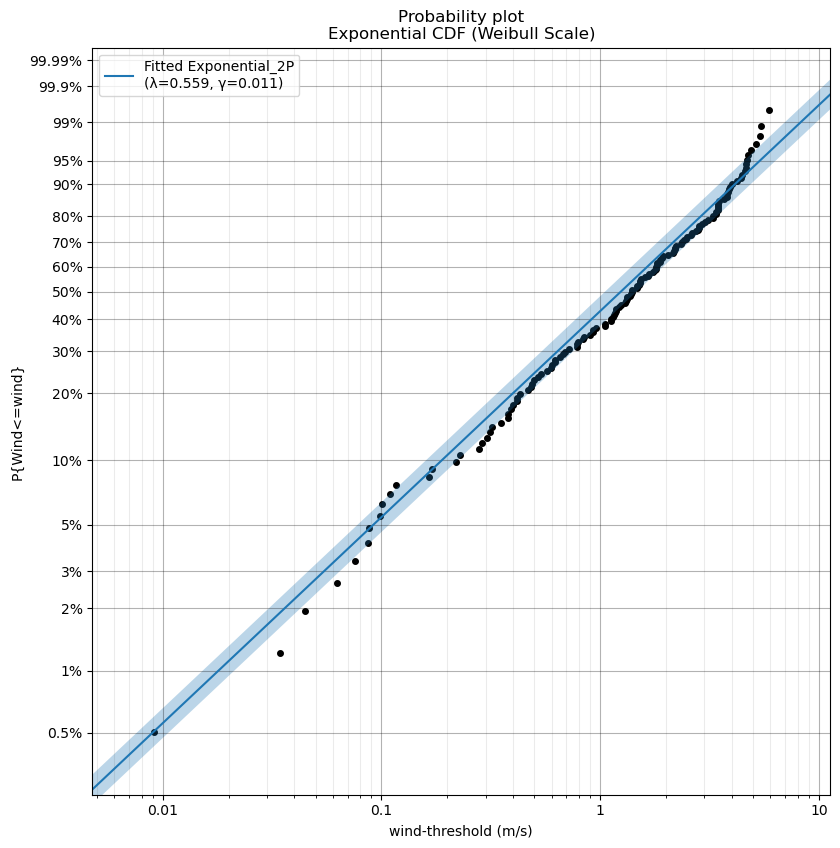

In [13]:
wae = rf.Fit_Exponential_2P(failures=dfmax)
plt.ylabel('P{Wind<=wind}')
plt.xlabel('wind-threshold (m/s)')
plt.show()

## Calculation of 100 year return wind

In [14]:
#
#  Determine return period values
#
#
# define exceedance value for 100 yr return
# 
treturn = 40000
numberyears = 6
numb = len(pot_maxima) / numberyears
prob = 1 - 1/(numb * treturn)
print(prob)

0.9999989208633093


In [18]:
# Weibull 2
X_lower,X_point,X_upper = waw2.distribution.CDF(CI_type='time',CI_y=prob,show_plot=False)
X_point = X_point + tare
print('Weibull2P ',treturn,'Year return value is ',X_point,' (m/s)')

# Weibull 3
X_lower,X_point,X_upper = waw3.distribution.CDF(CI_type='time',CI_y=prob,show_plot=False)
X_point = X_point + tare
print('Weibull3P ',treturn,'Year return value is ',X_point,' (m/s)')

# Gumbel
X_lower,X_point,X_upper = wag.distribution.CDF(CI_type='time',CI_y=prob,show_plot=False)
X_point = X_point + tare
print('Gumbel ',treturn,'Year return value is ',X_point,' (m/s)')

# Exponential
X_lower,X_point,X_upper = wae.distribution.CDF(CI_y=prob,show_plot=False)
X_point = X_point + tare
print('Exponential ',treturn,'Year return value is ',X_point,' (m/s)')

Weibull2P  40000 Year return value is  31.31514058321042  (m/s)
Weibull3P  40000 Year return value is  31.31514058321042  (m/s)
Gumbel  40000 Year return value is  19.32698286317627  (m/s)
Exponential  40000 Year return value is  37.098213648231386  (m/s)


## Compare all  distributions

Results from Fit_Everything:
Analysis method: MLE
Failures / Right censored: 139/0 (0% right censored) 

   Distribution   Alpha    Beta     Gamma Alpha 1  Beta 1 Alpha 2  Beta 2 Proportion 1 DS       Mu   Sigma   Lambda  Log-likelihood    AICc     BIC       AD optimizer
 Exponential_1P                                                                                            0.555491        -220.718 443.466 446.371  1.03123       TNC
     Weibull_CR                           2.00677 1.02231 5.06583 7.15886                                                  -213.815 435.928 447.368 0.209411       TNC
     Weibull_2P 1.88105 1.13784                                                                                            -219.055 442.199 447.979 0.623733       TNC
       Gamma_2P 1.54629 1.16421                                                                                             -219.75 443.588 449.369 0.670333       TNC
 Exponential_2P                 0.0106348                   

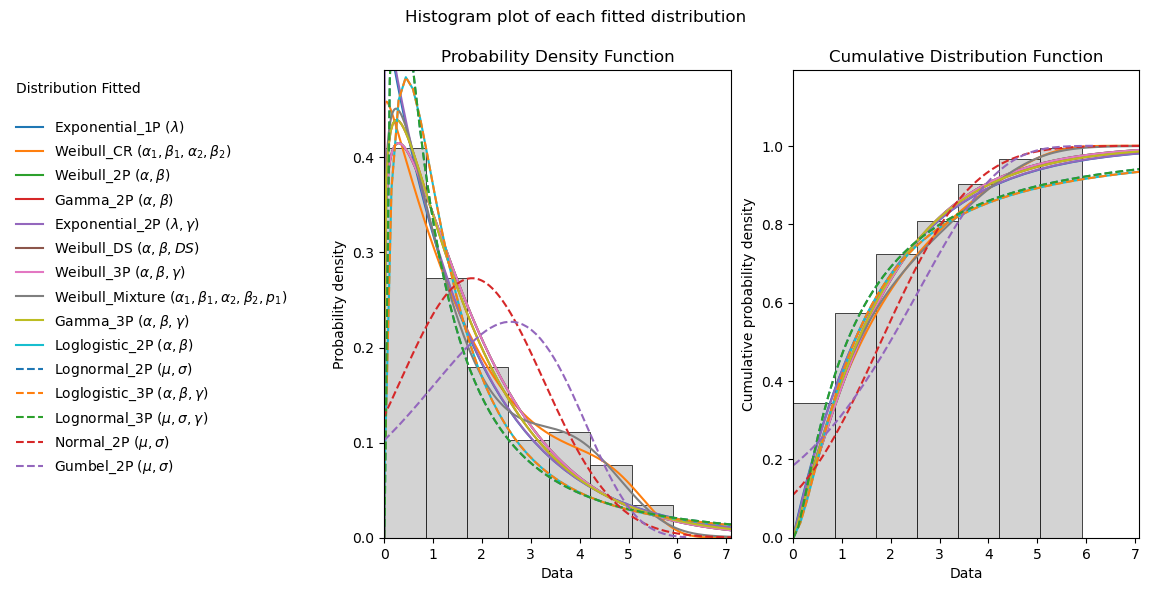

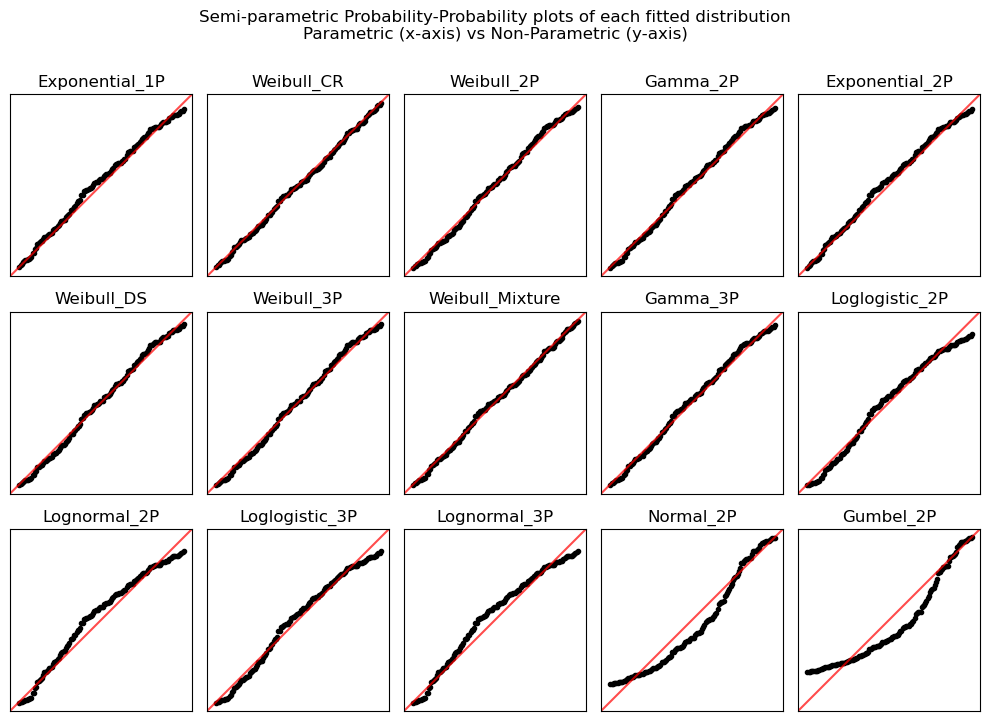

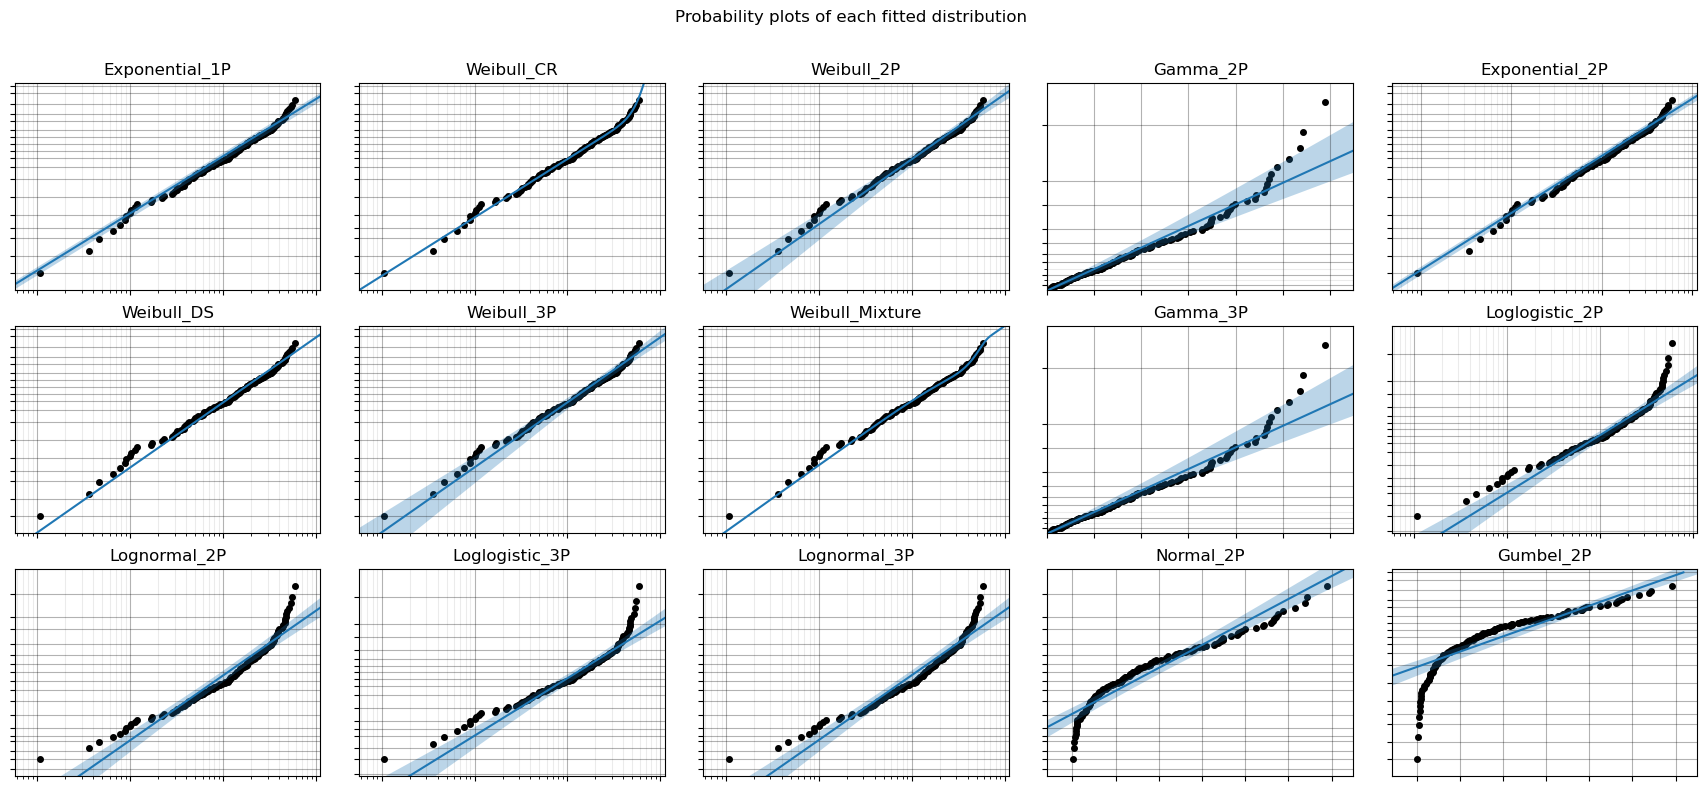

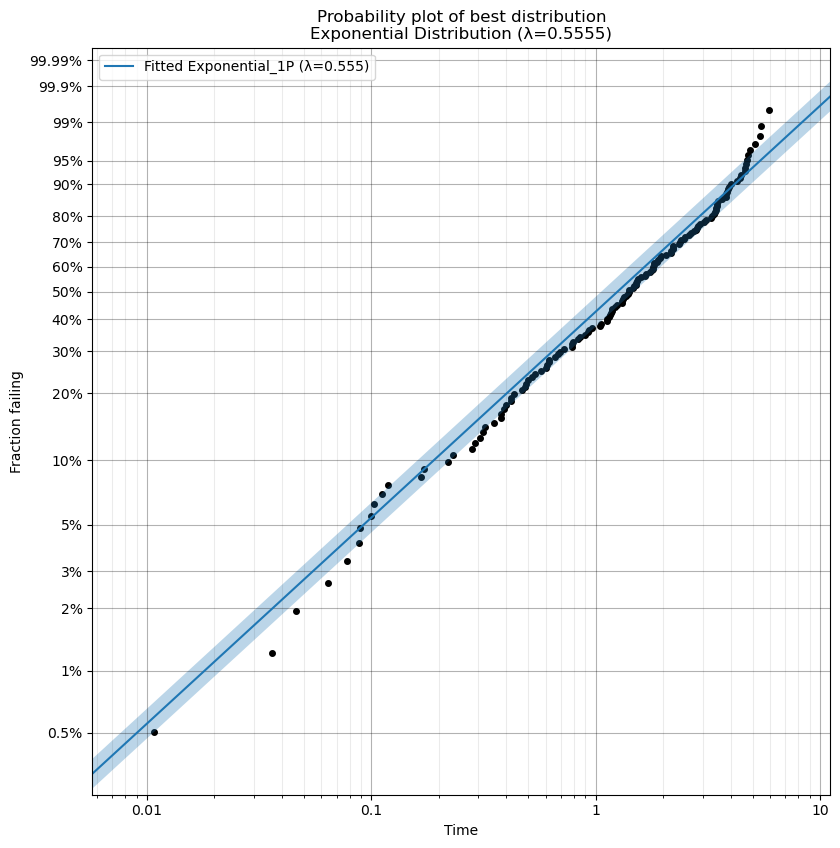

The best fitting distribution was Exponential_1P which had parameters [0.55549119 0.        ]


In [16]:
results = rf.Fit_Everything(failures=dfmax)  # fit all the models
print('The best fitting distribution was', results.best_distribution_name, 'which had parameters', results.best_distribution.parameters)